# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze some popular songs from Spotify. The dataset contains a number of variables that describe the songs, which we'll use to predict which genre it belongs to. 

---------

## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform modeling using logistic regression.

Look into the follow concepts, which will help you when modelling:
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [ ]:
#if data is read from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('data.csv')

## Requirements

* Perform basic EDA.
* Perform dimensionality reduction on song features, verify data separability by genre (PCA and/or t-SNE).
* Infer genre using song features with logistic regression.
* Cluster songs by features. Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.

### Perform basic EDA

In [ ]:
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
data.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

From the above info, there are no missing values in the data.

In [ ]:
#To describe the data
data.describe(include='all')

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,jazz.00015.au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hiphop
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,NaN,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,36.293063,-1.146627,14.634083,-5.129624,10.119876,-6.995752,7.730251,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875,NaN
std,NaN,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,16.666987,12.222555,11.840802,9.941638,10.464090,8.284181,7.937977,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561,NaN
min,NaN,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,-38.903451,-28.424546,-32.933588,-24.947537,-31.653059,-12.051190,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203,NaN
25%,NaN,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,24.107395,-9.974552,5.097782,-12.870050,1.609752,-13.249849,1.621692,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000,NaN
50%,NaN,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,-10.716073,36.957074,-0.015239,15.007553,-5.717005,9.663922,-7.512299,7.151456,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198,NaN
75%,NaN,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,48.212826,7.920911,23.857726,2.974185,18.708671,-0.383367,14.399350,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739,NaN


- There are 1000 unique files
- The top music type is the metal music
- There are 10 unique music labels
- The top music labels are pop

Compare music genres with tempo

Hypothesis: Loud music have high tempo


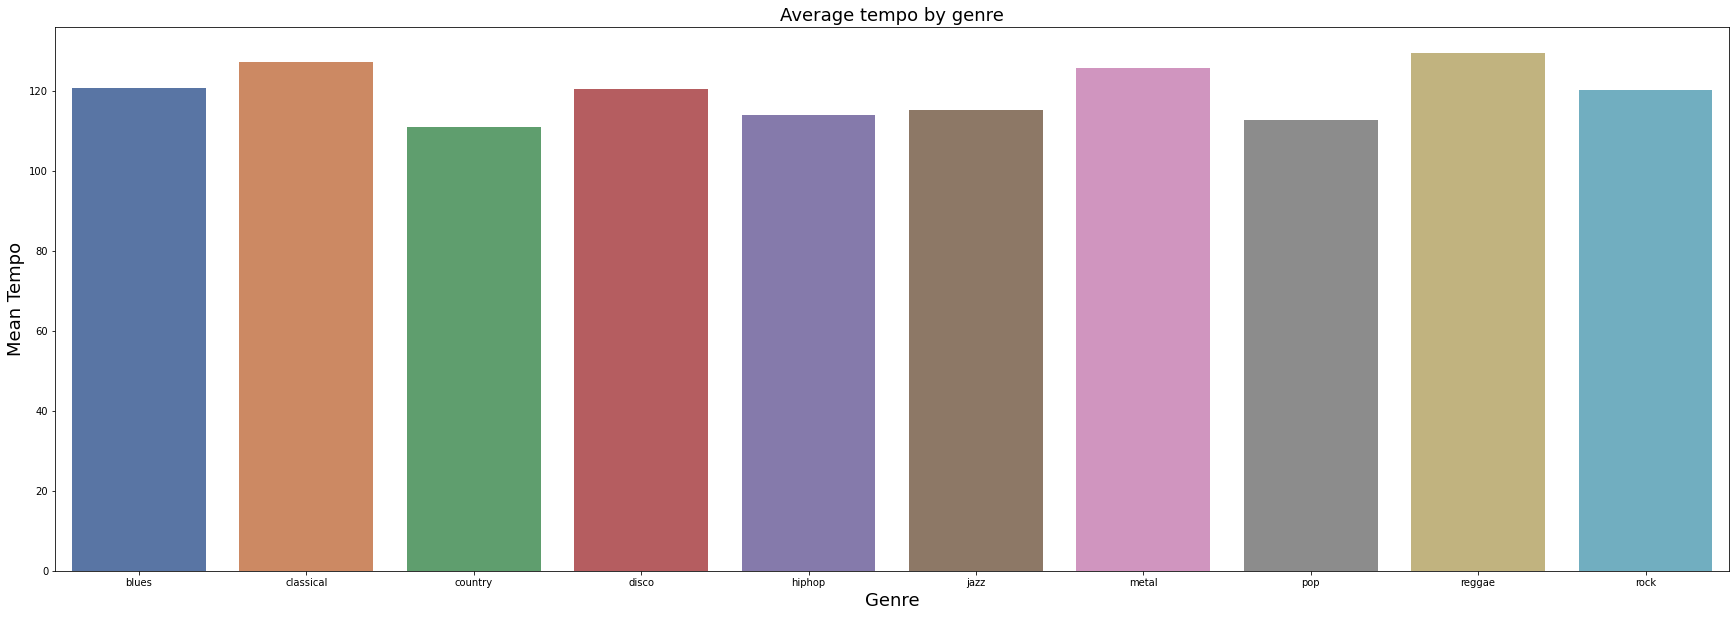

In [ ]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

tempos = [ data[data['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos, ci= 95, palette="deep")

plt.title("Average tempo by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Tempo', fontsize = 18);

The Classical and Metal types of music have the highest tempo.

We will look at the Spectral Centroid for the music part. 

Hypothesis: Music with higher spectral centroid tend to have brighter sounds. 

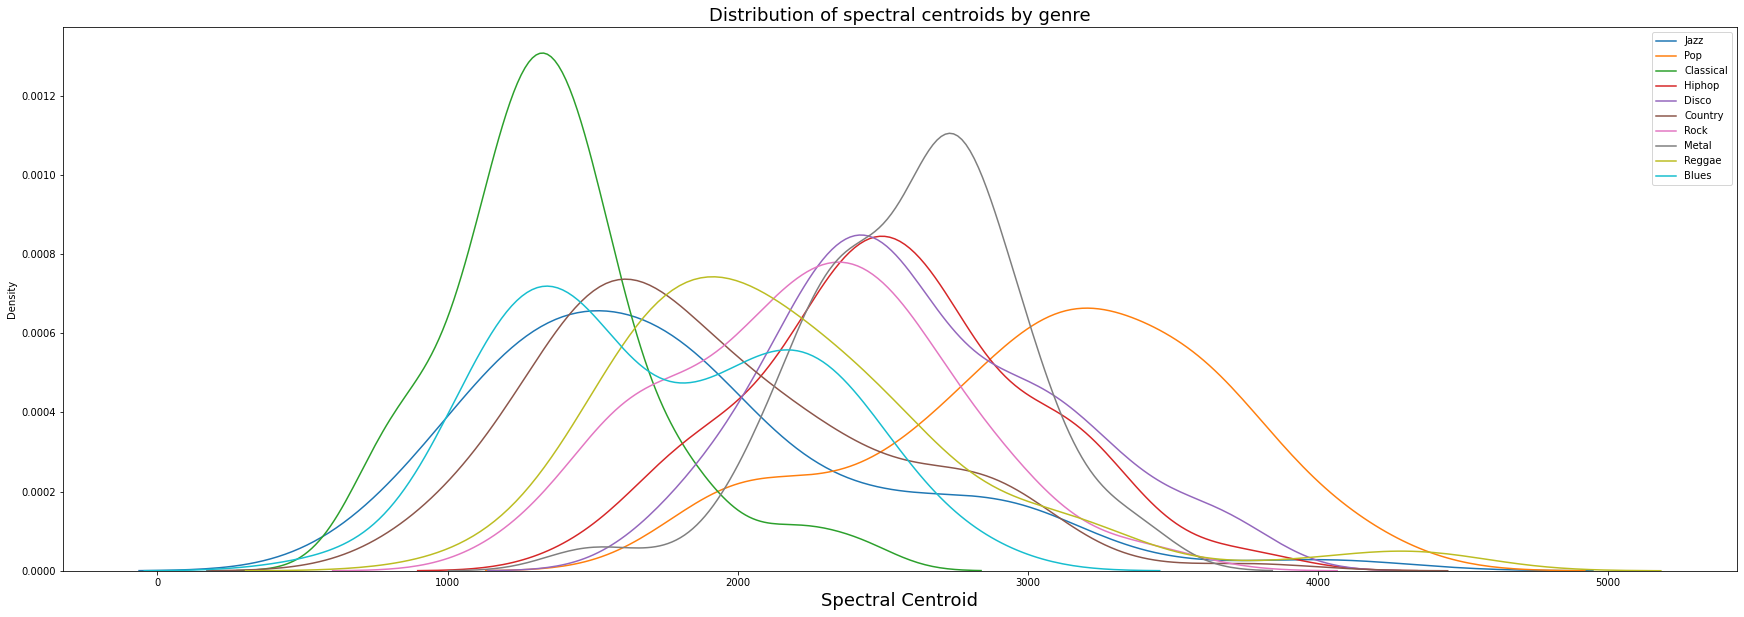

In [ ]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'spectral_centroid'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'spectral_centroid'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'spectral_centroid'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'spectral_centroid'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'spectral_centroid'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'spectral_centroid'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'spectral_centroid'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'spectral_centroid'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'spectral_centroid'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'spectral_centroid'], label="Blues")

plt.title("Distribution of spectral centroids by genre", fontsize = 18)
plt.xlabel("Spectral Centroid", fontsize = 18)
plt.legend();

The classical and metal genres both have fairly low variance, implying that they are less diverse in terms of spectral centroids.
The distributions of classical and metal have very little overlap.

We will look at the Beats. 

Hypothesis: Disco music have higher beats than other music.

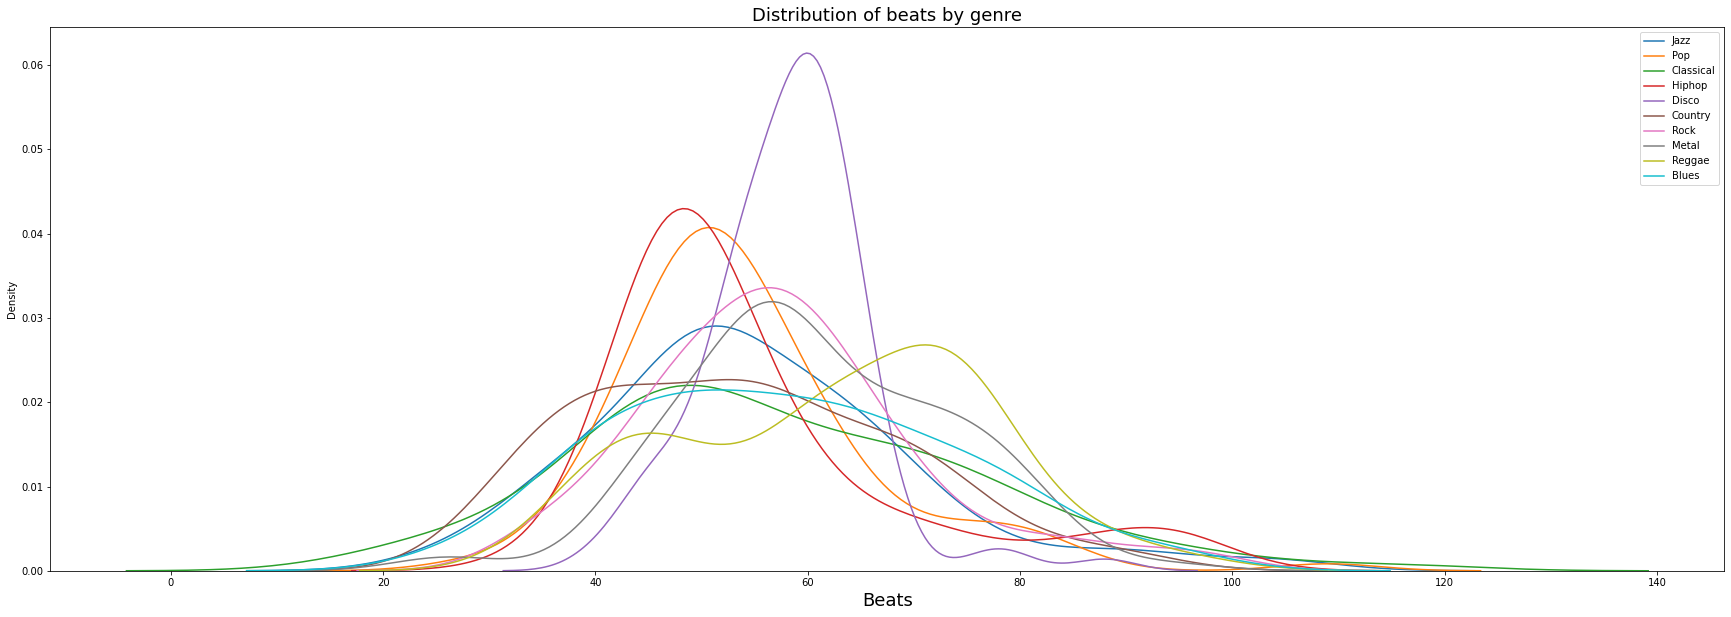

In [ ]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'beats'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'beats'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'beats'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'beats'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'beats'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'beats'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'beats'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'beats'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'beats'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'beats'], label="Blues")

plt.title("Distribution of beats by genre", fontsize = 18)

plt.xlabel("Beats", fontsize = 18)

plt.legend()

This proves my hypothesis right as disco music has the highest beats.

To avoid using features with stong correlations, we create a correlation matrix

In [4]:
corr_metrics = data.corr()
#corr_metrics.style.background_gradient()
corr_metrics

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
tempo,1.000000,0.966179,0.030640,-0.043503,-0.014415,-0.039283,-0.020564,0.019935,0.011271,0.007200,...,-0.078778,-0.028215,-0.045415,0.010452,-0.055127,0.024411,-0.076208,-0.010242,-0.061399,-0.027405
beats,0.966179,1.000000,0.080684,0.004607,0.035843,0.011287,0.033489,0.056517,0.082156,-0.041055,...,-0.075456,0.015129,-0.052768,0.050075,-0.063695,0.044109,-0.093770,0.006229,-0.078372,-0.027907
chroma_stft,0.030640,0.080684,1.000000,0.499577,0.615524,0.517482,0.597910,0.554735,0.659294,-0.598495,...,0.072668,0.516620,-0.081725,0.417161,-0.143455,0.332396,-0.163450,0.269791,-0.089906,0.281775
rmse,-0.043503,0.004607,0.499577,1.000000,0.509984,0.529768,0.537718,0.332119,0.807260,-0.483765,...,0.117410,0.183310,0.012818,0.163065,-0.011243,0.083827,-0.029601,0.118253,0.031517,0.124827
spectral_centroid,-0.014415,0.035843,0.615524,0.509984,1.000000,0.904438,0.979633,0.874755,0.720831,-0.940171,...,0.152749,0.174946,0.051260,0.170689,0.022393,0.153678,0.027403,0.228048,0.027761,0.269598
spectral_bandwidth,-0.039283,0.011287,0.517482,0.529768,0.904438,1.000000,0.956194,0.612325,0.648373,-0.896660,...,0.289572,0.038078,0.205272,0.054740,0.127649,0.027062,0.104914,0.114624,0.098151,0.187932
rolloff,-0.020564,0.033489,0.597910,0.537718,0.979633,0.956194,1.000000,0.779809,0.721746,-0.934305,...,0.173940,0.162827,0.081738,0.158572,0.032146,0.132326,0.039624,0.205010,0.048121,0.256644
zero_crossing_rate,0.019935,0.056517,0.554735,0.332119,0.874755,0.612325,0.779809,1.000000,0.634139,-0.760127,...,-0.044591,0.263046,-0.142050,0.240698,-0.107069,0.249474,-0.076885,0.297152,-0.074580,0.305031
mfcc1,0.011271,0.082156,0.659294,0.807260,0.720831,0.648373,0.721746,0.634139,1.000000,-0.638911,...,-0.027021,0.331619,-0.171697,0.252206,-0.200787,0.185659,-0.208503,0.199769,-0.121578,0.195352
mfcc2,0.007200,-0.041055,-0.598495,-0.483765,-0.940171,-0.896660,-0.934305,-0.760127,-0.638911,1.000000,...,-0.203910,-0.176990,-0.110567,-0.195790,-0.064465,-0.160305,-0.051064,-0.202594,-0.027793,-0.238651


This graph more clearly shows the features with the strongest positive correlations.
Here we can see that rolloff is strongly correlated with both spectral centroid and spectral bandwidth.

It is also expected that there will be a correlation between the tempo and beats since they deal with sound density.

We can also see that there is also a fairly strong correlation between spectral bandwidth and centroid.

I would have expected the correlation between zero crossing rate and spectral centroid to be higher, since they are both dependent on frequency.

Let's see those features that have negative correlation.


In [ ]:
data_corr = data.corr()
data_unstack = data_corr.unstack()
sort_data = data_unstack.sort_values(kind="quicksort")

print(sort_data[:10])

spectral_centroid   mfcc2                -0.940171
mfcc2               spectral_centroid    -0.940171
rolloff             mfcc2                -0.934305
mfcc2               rolloff              -0.934305
spectral_bandwidth  mfcc2                -0.896660
mfcc2               spectral_bandwidth   -0.896660
zero_crossing_rate  mfcc2                -0.760127
mfcc2               zero_crossing_rate   -0.760127
                    mfcc1                -0.638911
mfcc1               mfcc2                -0.638911
dtype: float64


We can see that mfcc2 (the second coefficient of the Mel-frequency cepstrum, a mathematical representation of the sound) has a strong negative correlation with centroid, rolloff, and bandwidth.

In [ ]:
sort_data.drop_duplicates()[:10]

spectral_centroid   mfcc2   -0.940171
rolloff             mfcc2   -0.934305
spectral_bandwidth  mfcc2   -0.896660
zero_crossing_rate  mfcc2   -0.760127
mfcc2               mfcc1   -0.638911
chroma_stft         mfcc2   -0.598495
mfcc8               mfcc7   -0.487295
mfcc2               rmse    -0.483765
mfcc6               mfcc7   -0.482113
mfcc15              mfcc6   -0.479754
dtype: float64

In [ ]:
# filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
 
dataCorr.sort_values(by=[0], ascending=False).head(10) #Get 10 highest correlation of pairwaise attributes


### Perform dimensionality reduction on song features, verify data separability by genre (PCA and/or t-SNE).

To do this, we need to standardize our data, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features.

We will use Standard Scaler to achieve this.

In [ ]:
data.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [ ]:
features = data.drop(["filename","label"], axis=1)
labels = data["label"]
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

Principal component analysis on scaled data.

In [ ]:
pca = PCA()
data_pca = pca.fit_transform(X=scaled_train_features)
 
# Store as dataframe and print
df_pca = pd.DataFrame(data_pca)
print(df_pca.shape)
df_pca.round(2).head()

(1000, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,4.03,-0.61,0.57,-1.05,0.80,1.81,-0.59,0.50,1.42,-0.04,0.40,1.13,0.02,0.46,-0.15,-0.48,0.25,-0.26,0.02,0.29,-0.57,0.11,0.12,0.36,0.05,-0.05,0.13,-0.05
1,-2.29,-2.08,-2.34,-0.89,-1.54,0.36,-0.63,-0.81,0.60,0.81,-1.12,-0.81,0.03,1.05,0.67,0.37,0.62,-0.46,-0.43,-0.90,0.36,1.31,-0.53,-0.37,-0.21,0.08,-0.03,-0.04
2,-0.30,-4.85,5.84,0.64,-1.86,-1.34,0.22,1.98,0.54,1.31,0.40,-0.69,-1.51,0.43,-0.16,-1.67,0.45,0.27,-0.10,-0.24,0.18,0.44,0.04,0.34,-0.23,-0.18,0.13,-0.02
3,-1.20,-3.20,1.35,3.07,-1.57,0.59,-0.58,-0.78,0.17,0.93,-1.50,-0.23,0.94,1.45,0.80,0.14,0.49,-0.58,0.88,-0.65,-0.05,0.70,-0.18,-0.23,0.20,0.04,0.01,-0.05
4,1.26,-0.90,0.05,1.67,-1.35,-0.12,-1.07,-0.32,-1.40,0.23,0.18,-0.00,-0.36,0.22,-0.04,0.74,-0.23,-0.15,-0.48,0.38,-0.09,0.07,-0.11,0.15,-0.11,0.20,0.01,-0.03


In [ ]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.030008,0.044139,0.157238,0.055013,0.057022,-0.015500,0.045491,0.119436,0.138964,-0.049864,-0.182255,0.238446,-0.247286,0.275526,-0.247706,0.293390,-0.224359,0.283482,-0.222483,0.278833,-0.246060,0.227834,-0.226982,0.199798,-0.189316,0.152978,-0.152764,0.093722
1,-0.020146,-0.000442,0.257161,0.243059,0.355900,0.356105,0.360199,0.272121,0.273652,-0.350647,0.130244,-0.076786,0.117762,-0.008809,0.175708,0.035867,0.202499,0.064141,0.158979,0.061994,0.114921,0.078837,0.096945,0.071210,0.088214,0.099322,0.085818,0.131046
2,0.105439,0.111231,-0.002071,0.100149,0.147287,0.147702,0.146302,0.129922,0.180327,-0.109278,0.048093,-0.080870,-0.029601,-0.076824,-0.068950,-0.096386,-0.119556,-0.168398,-0.181838,-0.193424,-0.205989,-0.285228,-0.274693,-0.343401,-0.332340,-0.311359,-0.307353,-0.279985
3,0.693734,0.689476,0.015013,-0.052556,-0.008034,-0.027464,-0.016091,0.016097,-0.020897,0.001715,-0.073811,-0.017523,-0.018347,-0.017941,0.010119,-0.013518,0.030327,0.007411,0.037704,-0.035148,0.072724,0.034051,0.085328,0.067205,0.068395,0.043747,0.053799,0.023042
4,-0.033891,-0.058592,-0.216195,-0.165689,0.157887,0.005982,0.094977,0.328160,-0.017400,-0.030254,-0.238423,-0.263307,-0.317361,-0.305694,-0.206142,-0.246627,-0.113919,-0.121167,-0.209235,-0.142969,-0.161180,-0.103071,-0.022924,0.068806,0.171558,0.295405,0.188207,0.262322


In [ ]:
X_mean = features - features.mean()
X_mean.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,-16.242327,-7.138,0.001605,0.117334,-84.891267,-285.948557,-375.594199,0.023635,117.549388,7.781809,-37.888044,4.639571,-20.317149,10.182192,-13.815947,5.133583,-8.054353,4.532572,-9.212929,9.865008,-9.024537,5.781242,-2.311097,-0.817823,-2.862141,0.458619,-5.242046,4.013861
1,-23.898577,-13.138,-0.072205,-0.017453,-1045.763729,-744.891437,-2401.648614,-0.045024,-89.381599,36.618040,12.211439,12.638130,9.845733,-0.679331,10.489073,-9.738542,-6.494514,9.141518,11.166378,-6.722182,8.756429,3.541008,4.682304,-2.255189,-0.589124,-2.943792,5.645692,0.486390
2,32.397379,17.862,-0.125169,0.020642,-870.760256,-268.916176,-1671.528029,-0.060670,-77.323377,11.290871,27.542933,-5.370066,4.437957,7.953364,-15.288679,2.001119,-19.352205,-12.086521,-20.385554,-17.509327,-7.854996,-3.603453,-3.389821,-7.808239,-10.715263,-12.226566,-8.696437,-12.292386
3,64.968611,33.862,-0.109336,-0.011857,-840.788758,-674.755018,-1832.077059,-0.034513,-62.728907,33.246976,-6.517037,24.693664,1.872434,-2.196255,6.313460,-11.660656,-10.892402,0.628245,3.569053,-5.084852,5.182109,0.823581,-1.318648,-10.675443,-5.276963,-3.355576,0.910072,-4.837732
4,41.897322,16.862,0.012403,0.006800,-390.758142,-190.227050,-643.892577,-0.028158,-0.955395,3.276824,-3.595728,20.700410,3.417974,11.957319,0.854821,7.218933,-0.989841,7.505176,-0.913479,2.985614,-5.673212,-4.142031,-2.913348,1.523146,-0.793449,-1.456307,2.353611,-0.910440


In [ ]:
# Compute PC1 for row 1. 
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])  

-184.51684940612478

In [ ]:
print(pca.explained_variance_ratio_.round(2))

[0.3  0.24 0.1  0.07 0.06 0.03 0.03 0.03 0.02 0.02 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]


It gets only 30% from the first componenent

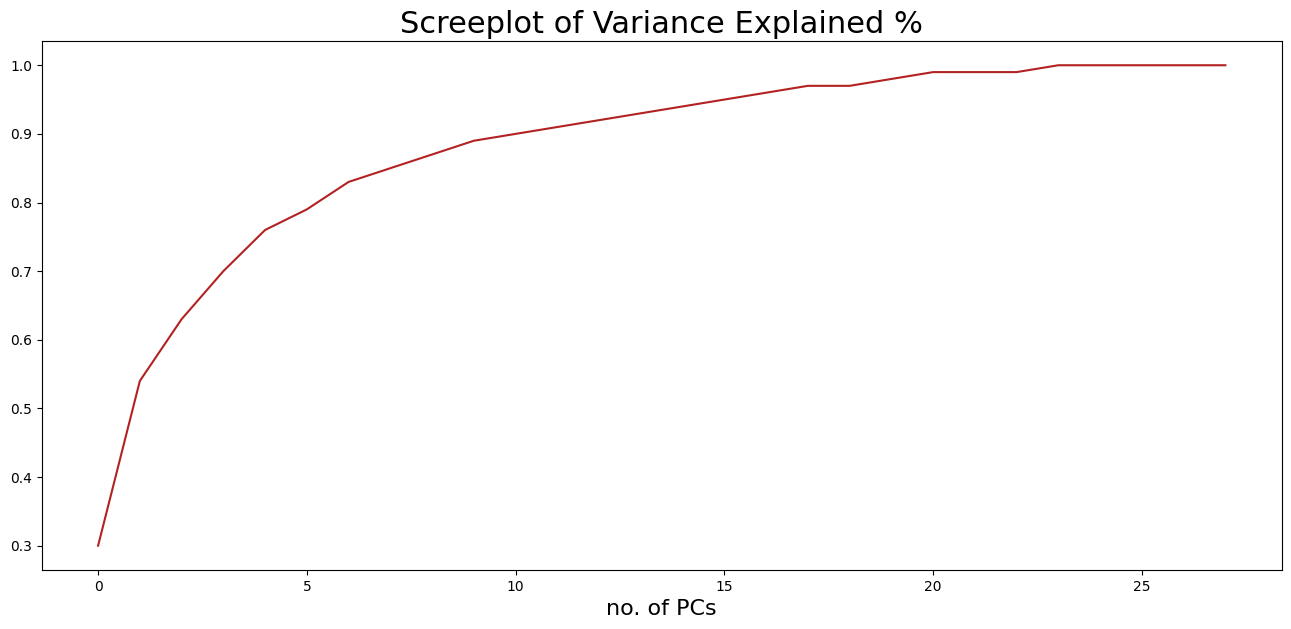

In [ ]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('no. of PCs', fontsize=16)
plt.show()

The Scree plot orders the eigenvalues/components from largest to lowest. We can say from the above that 3 components is a good number of components to use.

In [ ]:
finalDf = pd.concat([df_pca, data['label']], axis = 1)
finalDf.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,label
995,4.478895,-0.604256,0.643356,-0.087544,0.918818,0.946104,-0.503375,0.013614,-0.427966,-0.128059,-0.184545,-0.136426,-0.111657,0.219037,-0.012922,0.228964,-0.006064,-0.339722,0.009490,0.023350,0.014161,0.028314,0.129153,-0.150412,0.017192,0.050148,0.107441,0.005626,rock
996,3.762586,-0.601913,0.369972,-0.282879,2.171644,-0.612941,-0.692473,-1.433776,0.983306,0.517046,-0.232317,0.490621,-0.326145,0.692632,-0.766559,0.086536,-0.194347,0.028981,-0.136409,-0.325363,0.276324,0.021861,-0.306316,0.131093,-0.012097,-0.004428,-0.067164,0.073290,rock
997,1.270227,-2.046620,-0.169743,-1.355980,-2.408872,0.467435,-0.976728,1.137152,-0.175015,0.325558,0.086471,0.387825,0.355458,-0.511594,-0.370476,-0.076571,-0.010089,-0.028402,0.056087,0.407263,-0.760569,0.141447,-0.048723,-0.020388,0.059765,0.243175,0.090275,0.056786,rock
998,0.908852,-2.621537,1.167707,-0.955720,0.450212,2.221822,-0.614610,0.148635,-0.063177,0.290207,-0.624558,0.306019,-0.145701,0.857300,-0.374631,-1.106486,-0.059510,-0.403681,-0.676735,0.130670,0.158412,-0.678731,0.696136,0.041083,0.240523,0.471637,0.001826,0.044738,rock
999,1.530843,-1.974749,1.120972,-2.353465,0.720769,-0.988984,1.045707,-0.335404,-0.759630,0.199856,-0.531206,-1.048390,-0.332137,-0.145933,0.144045,-0.101609,0.887633,0.068160,-0.494950,0.443361,0.300174,-0.366545,0.068131,0.347796,0.330343,-0.082530,0.032424,0.004523,rock


In [ ]:
fig = px.scatter(data_pca, x = 0, y = 1, color = finalDf['label'])
fig.show()

This shows that the data is separable

Split dataset

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(labels)
label = le.transform(labels)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(scaled_train_features, label, random_state=10)

### Infer genre using song features with logistic regression.

In [ ]:
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Logistic Regression: \n", class_rep_log)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.46      0.57      0.51        21
           1       0.90      0.90      0.90        29
           2       0.48      0.46      0.47        26
           3       0.50      0.60      0.55        20
           4       0.53      0.59      0.56        27
           5       0.55      0.75      0.63        24
           6       0.83      0.91      0.87        22
           7       0.78      0.75      0.77        24
           8       0.62      0.32      0.43        31
           9       0.40      0.31      0.35        26

    accuracy                           0.61       250
   macro avg       0.61      0.62      0.60       250
weighted avg       0.61      0.61      0.60       250



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Cluster songs by features

In [ ]:
kmeans = KMeans(n_clusters=10,init='k-means++',
                random_state=15).fit(scaled_train_features)

In [ ]:
kmeans.inertia_

12311.101511259429

Text(0, 0.5, 'Inertia')

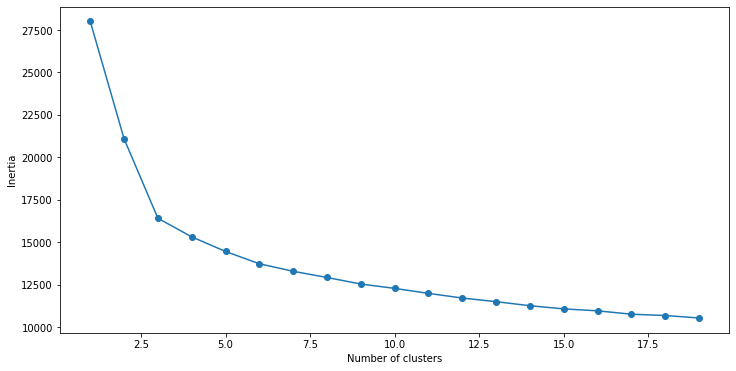

In [ ]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_train_features)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 10, init='k-means++')
kmeans.fit(scaled_train_features)
pred = kmeans.predict(scaled_train_features)

In [ ]:
frame = pd.DataFrame(scaled_train_features)
frame['cluster'] = pred
frame['cluster'].value_counts()

7    159
4    142
6    140
2    126
3     98
5     93
9     90
0     83
8     57
1     12
Name: cluster, dtype: int64

In [ ]:
frame['file_name'] = data.filename

In [ ]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,cluster,file_name
0,-0.574274,-0.502018,0.019652,1.787196,-0.118629,-0.543552,-0.238627,0.565253,1.173317,0.248491,-1.747268,0.278508,-1.663099,0.860355,-1.390401,0.490836,-0.972743,0.571284,-1.351740,1.469329,-1.463162,1.154636,-0.474364,-0.178688,-0.629267,0.118593,-1.396502,1.046464,7,blues.00081.au
1,-0.844974,-0.924000,-0.884337,-0.265843,-1.461374,-1.415943,-1.525842,-1.076777,-0.892161,1.169299,0.563150,0.758653,0.805941,-0.057401,1.055593,-0.931129,-0.784358,1.152194,1.638354,-1.001226,1.419693,0.707214,0.961067,-0.492742,-0.129524,-0.761230,1.504035,0.126808,5,blues.00022.au
2,1.145463,1.256241,-1.533017,0.314416,-1.216820,-0.511175,-1.061974,-1.450966,-0.771802,0.360544,1.270186,-0.322359,0.363277,0.672027,-1.538612,0.191332,-2.337212,-1.523382,-2.991010,-2.607901,-1.273542,-0.719685,-0.695778,-1.706040,-2.355845,-3.161645,-2.316766,-3.204779,1,blues.00031.au
3,2.297073,2.381526,-1.339101,-0.180601,-1.174937,-1.282623,-1.163976,-0.825410,-0.626127,1.061653,-0.300544,1.482333,0.153272,-0.185575,0.635370,-1.114907,-1.315501,0.079184,0.523659,-0.757356,0.840183,0.164486,-0.270659,-2.332502,-1.160187,-0.867712,0.242447,-1.261258,8,blues.00012.au
4,1.481349,1.185910,0.151907,0.103572,-0.546054,-0.361597,-0.409085,-0.673412,-0.009536,0.104637,-0.165823,1.242622,0.279785,1.010346,0.086027,0.690222,-0.119546,0.945950,-0.134028,0.444688,-0.919806,-0.827251,-0.597980,0.332796,-0.174447,-0.376584,0.627012,-0.237363,6,blues.00056.au


### Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.

In [ ]:
generated_list = frame.loc[frame['cluster']==7,'file_name']

In [ ]:
generated_list[0:6]

0     blues.00081.au
6     blues.00066.au
7     blues.00060.au
12    blues.00040.au
15    blues.00068.au
16    blues.00071.au
Name: file_name, dtype: object

## Evaluation Criteria

- PCA/TSNE performed correctly and results analyzed
- Clustering done correctly and results analyzed
- Adherence to the requirements
- Model trained on given data and its performance evaluated
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What does a PCA do? How are principal components selected?
- Explain linear regression. What are the main assumptions of linear regression?
- What is K-means clustering? How does it work?
- When would you prefer T-SNE over. PCA?